# Annotated Barchart

Use the `labels` parameter to create an annotated Barchart.



In [1]:
import pandas as pd

from lets_plot import *


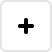
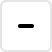
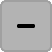
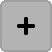
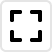
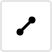
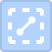
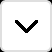
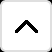
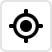
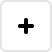
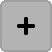
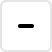
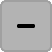
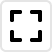
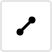
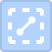
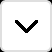
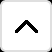
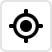

In [2]:
LetsPlot.setup_html()

In [3]:
mpg_df = pd.read_csv ("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
mpg_df.head(4)

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact


#### Configure Layer Labels Using API Similar to the Tooltip Configuration API

In [4]:
gggrid([
    ggplot(mpg_df) + geom_bar(aes("trans"),
                              labels=layer_labels().line('@..count..')),
    ggplot(mpg_df) + geom_bar(aes("trans", y="..n.."), stat="sum", size=0,
                              labels=layer_labels().line('@..proppct..')) + coord_flip()
], widths=[1, 1.2])    


#### Stacked Bars

In [5]:
ggplot(mpg_df, aes('class', fill='drv')) + \
    geom_bar(labels=layer_labels().line('@..proppct..').format('..proppct..', '{d} %')) + \
    ggsize(700, 400)

In [6]:
ggplot(mpg_df, aes('class', fill='drv')) + \
    geom_bar(labels=layer_labels().line('@..proppct..').format('..proppct..', '{d} %'), 
             position='fill') + \
    coord_flip() + \
    ggsize(700, 400)

#### Narrow Bars
Too thin for labels to fit in. 

In [7]:
ggplot(mpg_df, aes('class', fill='drv')) + \
    geom_bar(labels=layer_labels().line('@..proppct..').format('..proppct..', '{d} %'),
             position='dodge') + \
    ggsize(700, 400)

#### Color Adjustment (lightness correction)

In [8]:
from string import ascii_uppercase

data = {'v': list(ascii_uppercase)[:14]}

def with_label_color(color):
    if color is not None:
        return theme(label_text=element_text(color=color, face='bold',size=15))
    return theme(label_text=element_text(face='bold',size=15))

def bar_plot(color=None, palette=None):
    title_color = color if color is not 'white' else 'black'
    title = color if color is not None else 'Default'
    return (ggplot(data, aes('v', fill='v'))
            + geom_bar(labels=layer_labels().line('@v'))
            + theme(legend_position='none', text='blank', plot_title=element_text(color=title_color))
            + with_label_color(color)
            + scale_fill_brewer(palette=palette) 
            + ggtitle(title))

In [9]:
def bars(palette=None):
    return gggrid([
        bar_plot(palette=palette),
        None,
        
        bar_plot(color='white', palette=palette),
        bar_plot(color='black', palette=palette),
        bar_plot(color='grey', palette=palette),
        bar_plot(color='light_grey', palette=palette),

        bar_plot(color='red', palette=palette),
        bar_plot(color='pink', palette=palette),

        bar_plot(color='green', palette=palette),
        bar_plot(color='light_green', palette=palette),

        bar_plot(color='magenta', palette=palette),
        bar_plot(color='light_magenta', palette=palette),

        bar_plot(color='blue', palette=palette),
        bar_plot(color='cyan', palette=palette),
    ], 
        ncol=2) + ggsize(900,600)

In [10]:
bars()

In [11]:
bars(palette='Pastel2')

In [12]:
bars(palette='Set2')